In [11]:
!pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [12]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [15]:
!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 381.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 848.0 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 914.5 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/ayusharyakashyap/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████████████████████████████████| 6.25M/6.25M [00:06<00:00, 1.05MB/s]



0: 448x640 1 train, 79.1ms
Speed: 9.4ms preprocess, 79.1ms inference, 7.5ms postprocess per image at shape (1, 3, 448, 640)
Detected Plate Number: co


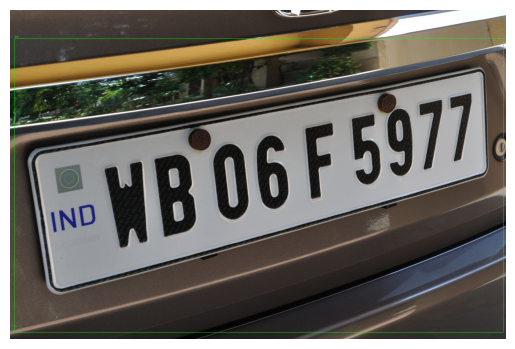

In [13]:
import cv2
import pytesseract
import numpy as np
from ultralytics import YOLO  # Using YOLOv8 for number plate detection

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Load pre-trained YOLO model

# Function to process the image and detect number plate
def detect_number_plate(image_path):
    image = cv2.imread(image_path)
    results = model(image)
    
    for result in results:
        for box in result.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box)
            plate = image[y1:y2, x1:x2]  # Crop detected number plate
            
            # Preprocess for OCR
            gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
            gray_plate = cv2.GaussianBlur(gray_plate, (5,5), 0)
            
            # Use OCR for text extraction
            plate_text = pytesseract.image_to_string(gray_plate, config='--psm 8')
            print("Detected Plate Number:", plate_text.strip())
            
            # Draw bounding box on image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, plate_text.strip(), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Convert image to RGB and return
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

# Example usage
result_image = detect_number_plate("car.jpg")
import matplotlib.pyplot as plt
plt.imshow(result_image)
plt.axis("off")
plt.show()


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
0: 448x640 1 train, 196.0ms
Speed: 18.7ms preprocess, 196.0ms inference, 14.2ms postprocess per image at shape (1, 3, 448, 640)
Detected Plate Number: 


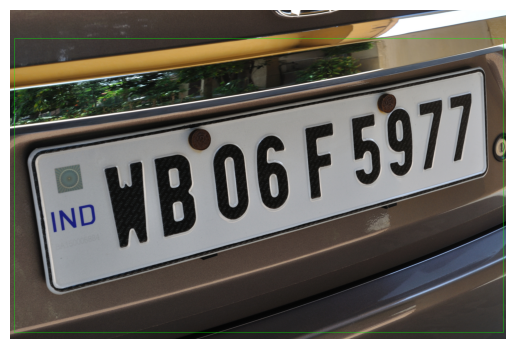

In [16]:
import cv2
import numpy as np
import easyocr  # Better than Tesseract for OCR
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 model trained for number plates
model = YOLO("yolov8n.pt")  

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

def detect_number_plate(image_path):
    image = cv2.imread(image_path)
    results = model(image)

    for result in results:
        for box in result.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box)
            plate = image[y1:y2, x1:x2]  # Crop the plate
            
            # Preprocess the image for OCR
            gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
            gray_plate = cv2.adaptiveThreshold(gray_plate, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                               cv2.THRESH_BINARY_INV, 31, 2)

            # Resize for better OCR accuracy
            gray_plate = cv2.resize(gray_plate, (300, 100))

            # Use EasyOCR for text extraction
            plate_text = reader.readtext(gray_plate, detail=0)
            
            # Print detected text
            detected_text = " ".join(plate_text).strip()
            print("Detected Plate Number:", detected_text)

            # Draw bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, detected_text, (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Show output using Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

# Run on an example image
detect_number_plate("car.jpg")


0: 448x640 1 train, 105.2ms
Speed: 18.8ms preprocess, 105.2ms inference, 11.7ms postprocess per image at shape (1, 3, 448, 640)
Detected Plate Number: 077


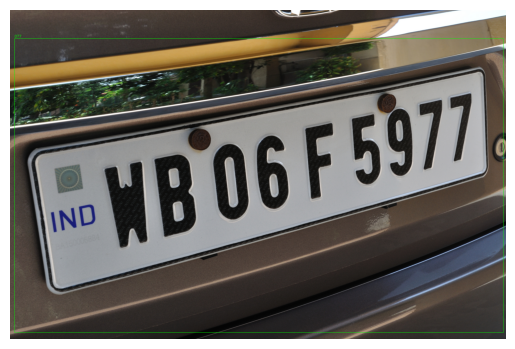

In [17]:
import cv2
import numpy as np
import easyocr
import pytesseract
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

def preprocess_plate(plate):
    """Apply preprocessing steps to improve OCR accuracy."""
    gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    gray = cv2.GaussianBlur(gray, (3, 3), 0)  # Reduce noise
    gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY_INV, 31, 2)  # Improve contrast
    
    # Morphological operations to clean up noise
    kernel = np.ones((2,2), np.uint8)
    gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    
    # Resize for better OCR
    gray = cv2.resize(gray, (300, 100))
    
    return gray

def detect_number_plate(image_path):
    image = cv2.imread(image_path)
    results = model(image)

    detected_text = ""
    
    for result in results:
        for box in result.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box)
            plate = image[y1:y2, x1:x2]  # Crop the plate
            
            # Preprocess the plate for OCR
            processed_plate = preprocess_plate(plate)

            # Use EasyOCR for text extraction
            plate_text = reader.readtext(processed_plate, detail=0)

            if plate_text:
                detected_text = " ".join(plate_text).strip()
            else:
                # Fallback to Tesseract OCR if EasyOCR fails
                detected_text = pytesseract.image_to_string(processed_plate, config="--psm 8").strip()

            print("Detected Plate Number:", detected_text)

            # Draw bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, detected_text, (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Show output using Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

# Run on an example image
detect_number_plate("car.jpg")